In [1]:
# !pip install pygad

In [41]:
import numpy 
import pandas

# PYGAD Example 1

c:\users\maury\appdata\local\programs\python\python39\lib\site-packages\pygad\pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
c:\users\maury\appdata\local\programs\python\python39\lib\site-packages\pygad\pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter inste

Generation = 1
Accuracy   = 75.0
Generation = 2
Accuracy   = 75.0
Generation = 3
Accuracy   = 75.0
Generation = 4
Accuracy   = 75.0
Generation = 5
Accuracy   = 75.0
Generation = 6
Accuracy   = 75.0
Generation = 7
Accuracy   = 75.0
Generation = 8
Accuracy   = 75.0
Generation = 9
Accuracy   = 75.0
Generation = 10
Accuracy   = 75.0
Generation = 11
Accuracy   = 75.0
Generation = 12
Accuracy   = 75.0
Generation = 13
Accuracy   = 75.0
Generation = 14
Accuracy   = 75.0
Generation = 15
Accuracy   = 75.0
Generation = 16
Accuracy   = 75.0
Generation = 17
Accuracy   = 75.0
Generation = 18
Accuracy   = 75.0
Generation = 19
Accuracy   = 75.0
Generation = 20
Accuracy   = 75.0
Generation = 21
Accuracy   = 75.0
Generation = 22
Accuracy   = 75.0
Generation = 23
Accuracy   = 75.0
Generation = 24
Accuracy   = 75.0
Generation = 25
Accuracy   = 100.0
Generation = 26
Accuracy   = 100.0
Generation = 27
Accuracy   = 100.0
Generation = 28
Accuracy   = 100.0
Generation = 29
Accuracy   = 100.0
Generation = 30
Ac

c:\users\maury\appdata\local\programs\python\python39\lib\site-packages\pygad\pygad.py:3105: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


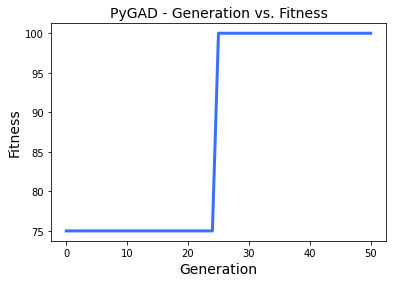

[-1.65144643  0.34019777  0.67805058 -0.5085312  -1.14456908  0.11258867
  0.6360944   0.01762074]
100.0
0


In [2]:
import numpy
import pygad
import pygad.nn
import pygad.gann
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}".format(fitness=ga_instance.best_solution()[1]))

data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])

GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=3, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

Generation = 1
Fitness    = 1.3886603999031604
Change     = 1.3886603999031604
Generation = 2
Fitness    = 1.7536898807004488
Change     = 0.3650294807972885
Generation = 3
Fitness    = 1.8948203844166314
Change     = 0.14113050371618252
Generation = 4
Fitness    = 1.9407004840265796
Change     = 0.04588009960994821
Generation = 5
Fitness    = 1.947338678894369
Change     = 0.006638194867789382
Generation = 6
Fitness    = 2.4139880529515247
Change     = 0.4666493740571558
Generation = 7
Fitness    = 2.4139880529515247
Change     = 0.0
Generation = 8
Fitness    = 3.1969661034345895
Change     = 0.7829780504830648
Generation = 9
Fitness    = 5.05071241124553
Change     = 1.8537463078109404
Generation = 10
Fitness    = 5.05071241124553
Change     = 0.0
Generation = 11
Fitness    = 6.058353123901749
Change     = 1.0076407126562188
Generation = 12
Fitness    = 6.058353123901749
Change     = 0.0
Generation = 13
Fitness    = 6.058353123901749
Change     = 0.0
Generation = 14
Fitness    = 6.05

Generation = 130
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 131
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 132
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 133
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 134
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 135
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 136
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 137
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 138
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 139
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 140
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 141
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 142
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 143
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 144
Fitness    = 41.2972498856328
Change     = 0.0
Generation = 145
Fitness    = 41.2972498

Generation = 285
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 286
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 287
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 288
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 289
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 290
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 291
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 292
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 293
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 294
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 295
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 296
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 297
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 298
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 299
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 300
Fitness 

Fitness    = 43.94505008800683
Change     = 0.0
Generation = 439
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 440
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 441
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 442
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 443
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 444
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 445
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 446
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 447
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 448
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 449
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 450
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 451
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 452
Fitness    = 43.94505008800683
Change     = 0.0
Generation = 453
Fitness    = 43.945050088

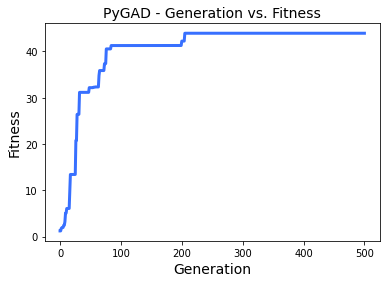

Parameters of the best solution : [-0.72032451  1.21504994 -1.12256291  0.03601738  0.13874066  0.04043037
 -1.06877175  0.80805488  0.0416378  -0.01905807  0.06706809  0.07610408]
Fitness value of the best solution = 43.94505008800683
Index of the best solution : 0
Best fitness value reached after 205 generations.
Predictions of the trained network : [array([0.10410891, 0.19995513]), array([1.79505871, 1.5819277 ])]
Absolute error : 0.022755691437314186.


In [3]:
import numpy
import pygad
import pygad.nn
import pygad.gann

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs, problem_type="regression")
    solution_fitness = 1.0/numpy.mean(numpy.abs(predictions - data_outputs))

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

# Holds the fitness value of the previous generation.
last_fitness = 0

# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([[2, 5, -3, 0.1],
                           [8, 15, 20, 13]])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([[0.1, 0.2],
                            [1.8, 1.5]])

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# Creating an initial population of neural networks. The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.
num_solutions = 6 # A solution or a network can be used interchangeably.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="None")

# population does not hold the numerical weights of the network instead it holds a list of references to each last layer of each network (i.e. solution) in the population. A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements. Each element is a reference to the last layer of each network. Using such a reference, all details of the network can be accessed.
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
initial_population = population_vectors.copy()

num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.

num_generations = 500 # Number of generations.

mutation_percent_genes = 5 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.

parent_selection_type = "sss" # Type of parent selection.

crossover_type = "single_point" # Type of the crossover operator.

mutation_type = "random" # Type of the mutation operator.

keep_parents = 1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

init_range_low = -1
init_range_high = 1

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                               problem_type="regression")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

# Calculating some statistics
abs_error = numpy.mean(numpy.abs(predictions - data_outputs))
print("Absolute error : {abs_error}.".format(abs_error=abs_error))

# Pygad Example 3

[-1.74877878  3.6055085  -2.85298105  0.35224058  0.31161803  3.29030127]
[ 1.03462316 -1.59056279  3.16597771  2.57160444  1.01697395  0.49263116]
[-0.0259118   1.40705404 -3.77695106 -0.60586205 -1.33097845  2.02826107]
[-3.93291222  0.27894192  0.63453054 -1.4831615   3.29283701 -0.58790082]
[-1.37212199  1.19491471 -3.85482667  1.73021153 -2.37655112 -1.76539376]
[-1.91920056  0.24071562 -0.44471979 -2.55609738  3.96458087  3.45581783]
[-2.63993935 -3.45171907  2.73850301 -3.88159953 -0.10698456  2.34554729]
[ 2.07098847  0.16849587 -0.57413414 -2.37733789 -1.62496266  3.74608899]
[-0.37359527  3.10431424 -0.04629441  1.30477001  1.09483105  3.38663454]
[ 0.73986509  0.73230419  1.66393109 -3.99446172 -2.7966386   1.78180816]
[-2.67453766  1.1203978  -2.47328547  2.64881807  2.14228617  1.05563126]
[-2.80337352  2.59629023 -3.55353645 -0.71746626 -3.33801002 -1.61423496]
[-1.52662512 -3.21824608  1.29416875 -0.19269251 -2.69953428 -0.66999617]
[ 2.42977740e-03  6.43757378e-01 -1.97

c:\users\maury\appdata\local\programs\python\python39\lib\site-packages\pygad\pygad.py:469: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))



[ 2.42977740e-03  3.56775502e-02  1.71723085e+00  3.80467658e+00
  4.69545077e-01 -1.50685463e+00]
[ 1.27845822  0.96016312  1.71723085  3.80467658 -2.46211688  2.3041033 ]
[-3.02756361 -0.15415148  3.3464094   3.1499595  -2.14654921 -1.70481794]
[-3.02756361 -3.26884425  1.8668006   1.80037629 -1.26930338 -1.05582107]
[-0.69752448 -3.26884425  2.41708604  1.80037629 -1.92154469  2.99936884]
[ 0.29920508 -2.66755807  2.57229196 -0.24652557 -2.69953428 -0.66999617]
[-1.52662512 -3.21824608 -1.97413208 -1.09090904 -3.56204144 -2.96993665]
[ 0.76864585  0.64375738 -1.97413208  3.80467658  0.46954508 -1.50685463]
[1.82601341 0.32648249 1.71723085 3.80467658 0.46954508 2.3041033 ]
[ 0.40957827 -1.41799561  2.89026824  3.1499595  -2.14654921 -2.32374276]
[-3.02756361 -0.15415148  2.89026824  3.1499595  -1.26930338 -1.37716323]
[ 0.29920508 -3.37422137  2.57229196  2.86471452 -1.92154469  2.99936884]
[ 0.29920508 -2.66755807  1.29416875  0.73022609 -2.69953428 -0.66999617]
[-1.52662512  0.64

[-3.02756361 -0.15415148  2.89026824  3.1499595  -2.46211688  1.66010698]
[ 1.82601341  1.1821029   2.68697042  3.80467658 -2.46211688  2.3041033 ]
[-2.26932822 -3.21824608  1.29416875 -1.90761743 -3.10394513 -2.96993665]
[-2.26932822 -2.5787013   1.29416875  2.41465161 -2.46211688  2.3041033 ]
[ 0.40957827 -1.41799561  2.98329703  2.41465161 -2.46211688  2.4362969 ]
[ 0.40957827 -1.41799561  2.98329703  2.41465161 -1.4684782  -0.66999617]
[-0.19801891 -2.66755807  2.89026824  2.99582571 -2.14654921 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  2.41465161 -3.3270469   2.3041033 ]
[ 1.82601341  0.96016312  1.16029983  3.80467658 -2.46211688  2.3041033 ]
[ 1.27845822  0.96016312  1.71723085  3.80467658 -2.94436245 -2.96993665]
[-2.26932822 -3.21824608  2.72894012  2.41465161 -2.82621802  2.3041033 ]
[ 1.82601341  0.96016312  2.72894012  2.41465161 -2.46211688  2.61107312]
[-0.19801891 -2.66755807  2.57229196 -0.19269251 -3.42704467 -0.66999617]
[-0.19801891 -2.66755807  2.57229196 -

[-2.26932822 -3.21824608  1.29416875 -1.09090904 -3.23414827  2.3041033 ]
[ 1.82601341  0.22261038  1.16029983  3.80467658 -2.46211688 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  3.1499595  -2.14654921 -1.47406538]
[-3.02756361 -0.15415148  2.89026824  4.15837849 -2.46211688  2.92029312]
[ 1.82601341  0.96016312  1.71723085  2.41465161 -1.46534397  2.3041033 ]
[ 1.82601341  0.96016312  1.71723085  3.80467658 -2.46211688  2.41358515]
[ 1.27845822  0.96016312  1.29416875 -1.09090904 -2.37439008 -2.96993665]
[-2.26932822 -3.21824608  1.16029983  3.80467658 -2.46211688  2.5001108 ]
[ 1.82601341  0.96016312  1.16029983  3.80467658 -3.15788275 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  3.1499595  -2.14654921 -0.50671199]
[-3.02756361 -0.15415148  2.89026824  3.80467658 -2.46211688  2.54991459]
[ 1.82601341  0.40328653  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 2.55328791  1.1821029   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.66883391  0.96016312  1.71723085  

[ 0.90320287  0.96016312  1.71723085  3.80467658 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.12255551  3.80467658 -2.46211688  2.3041033 ]
[-2.26932822 -3.21824608  1.410279   -1.09090904 -3.10394513 -2.96993665]
[-2.26932822 -3.21824608  2.89026824  3.1499595  -2.14654921 -1.47677964]
[-3.02756361 -0.15415148  2.89026824  2.83379508 -2.14654921 -1.32140666]
[-0.19801891 -2.41284108  2.57229196 -1.06847447 -2.69953428 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  3.1499595  -2.46211688  2.6161339 ]
[ 1.82601341  0.96016312  1.71723085  4.25436696 -2.46211688  2.3041033 ]
[ 1.82601341  0.96016312  2.65589563  3.80467658 -2.46211688  2.3041033 ]
[ 1.27595679  0.96016312  1.29416875 -1.09090904 -3.10394513 -2.96993665]
[-2.26932822 -3.21824608  1.29416875 -0.92588968 -3.10394513 -1.47406538]
[-3.02756361 -0.15415148  3.41024281 -1.06847447 -2.69953428 -1.32140666]
[-0.19801891  0.2223624   2.89026824  3.1499595  -2.14654921 -1.32140666]
[ 1.82601341  0.96016312  2.5418547   

[-3.02756361 -0.15415148  2.89026824  3.24207854 -2.14654921 -1.32140666]
[ 2.60893759  1.1821029   1.12255551  3.80467658 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.71723085  3.66043569 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   3.8902898   2.41465161 -2.46211688  2.3041033 ]
[ 1.0249164   1.1821029   2.98329703  2.41465161 -2.46211688 -1.32140666]
[-0.19801891 -2.85504299  2.57229196 -1.06847447 -2.69953428  2.3041033 ]
[ 1.81270573  0.96016312  1.71723085  3.80467658 -2.46211688 -1.32140666]
[-0.19801891 -2.66755807  2.57229196 -1.06847447 -2.69953428 -2.2366003 ]
[-3.02756361  1.1821029   1.12255551  3.80467658 -2.46211688  2.8582527 ]
[ 1.82601341  0.96016312  1.4017515   3.80467658 -2.46211688  2.92029312]
[ 2.34489476  0.96016312  1.71723085  3.80467658 -2.46211688  2.3041033 ]
[ 1.43935075  1.1821029   2.57229196 -1.06847447 -2.69953428 -1.32140666]
[-0.19801891 -2.41284108  1.60305312 -1.06847447 -2.46211688  2.3041033 ]
[-0.19801891 -2.66755807  2.24805729 -

[ 1.82601341  1.29765319  2.89026824  3.24207854 -2.14654921 -1.32140666]
[-3.99013335 -0.15415148  2.89026824  4.36153918 -2.46211688  2.92029312]
[ 1.82601341 -2.66755807  2.57229196 -0.22046636 -2.69953428 -1.32140666]
[-0.19801891 -2.66755807  2.57229196  3.1499595  -1.1909724  -1.32140666]
[-3.02756361 -0.15415148  1.12255551  3.80467658 -2.64512616  2.3041033 ]
[ 1.82601341  2.09743397  1.12255551  3.80467658 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.07569775  2.3041033 ]
[ 1.14193281  1.1821029   2.98329703  2.41465161 -2.14654921 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  4.36153918 -3.12853337  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.69953428 -0.78134607]
[-0.9565639  -2.66755807  2.57229196 -1.06847447 -2.14654921 -1.32140666]
[-2.65594887 -0.15415148  1.12255551  3.80467658 -2.46211688  2.3041033 ]
[ 1.82601341  2.09514604  1.12255551  3.80467658 -2.46211688  2.92029312]
[ 1.82601341  0.96016312  2.98329703  

[ 1.82601341  0.96016312  1.71723085  2.41465161 -2.46211688  1.552003  ]
[ 2.04497402  1.1821029   2.98329703  2.41465161 -2.69953428 -1.32140666]
[ 1.62646033  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  5.16680806 -2.69953428 -1.32140666]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[-0.19801891 -2.66755807  2.57229196 -1.06847447 -2.69953428 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  3.1499595  -2.14654921 -1.32140666]
[ 1.82601341  1.1821029   1.12255551  3.80467658 -2.46211688  2.3041033 ]
[ 1.82601341  0.96016312  1.71723085  3.80467658 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   2.52651957 -1.06847447 -2.69953428 -1.32140666]
[ 1.82601341  1.1821029   2.57229196 -1.06847447 -2.31017921 -1.32140666]
[-0.19801891 -2.66755807  2.57229196 -1.06847447 -2.69953428 -0.80660701]
[-3.02756361 -0.15415148  2.16182685  

[ 1.82601341  1.1821029   1.10996048  3.80467658 -1.49471479 -1.32140666]
[-0.19801891 -0.15415148  2.89026824  3.1499595  -2.14654921 -1.16553314]
[-3.02756361  1.1821029   2.98329703  2.41465161 -2.46211688  1.66335415]
[ 2.29289615  1.1821029   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 2.36562527  1.04591861  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  0.08133446  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 2.3760694   1.1821029   1.12255551  4.36153918 -2.46211688  2.3041033 ]
[-0.19801891 -2.66755807  1.85642716 -1.06847447 -2.69953428 -1.32140666]
[ 0.35105324 -2.66755807  2.57229196 -1.06847447 -2.14654921 -1.32140666]
[-3.02756361 -0.15415148  2.98329703  2.10904788 -2.46211688  2.3041033 ]
[ 1.93244289  1.1821029   1.12255551  3.94679683 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.12255551  2.41465161 -2.93319255  2.3041033 ]
[ 1.00864387  1.04591861  1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  

[ 1.82601341  1.04591861  3.57091605  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  1.67326947]
[ 1.82601341  1.04591861  2.02459524  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   0.8588658  -1.06847447 -2.69953428 -1.32140666]
[-3.02756361  0.62937764  2.89026824  3.1499595  -2.14654921 -1.32140666]
[-2.40794043 -0.15415148  2.89026824  3.1499595  -2.14654921  2.3041033 ]
[ 1.93244289  1.1821029   2.98329703  2.40478394 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.77920999 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.67147163  2.28086696]
[ 1.82601341  1.25302379  2.98329703  3.80467658 -2.46211688  2.3041033 ]
[ 1.82601341 -2.66755807  1.88971473 -1.06847447 -2.69953428 -1.32140666]
[-3.02756361 -0.15415148  3.31772617  3.1499595  -2.14654921 -1.32140666]
[-3.02756361 -0.15415148  2.89026824  3.1499595  -2.11638385  2.3041033 ]
[ 1.93244289  1.69407789  2.98329703  

[ 1.82601341  1.1821029   1.10996048  3.80467658 -2.46211688  1.5614257 ]
[ 1.39838158  1.1821029   1.10996048  3.80467658 -2.46211688 -1.32140666]
[-0.19801891 -2.66755807  2.57229196  2.90658101 -2.14654921 -1.32140666]
[-3.02756361  1.04591861  2.98329703  2.41465161 -2.55158163  2.3041033 ]
[ 1.82601341  1.04591861  3.96993449  2.41465161 -2.46211688  2.92029312]
[ 1.9354206   1.1821029   2.98329703  2.40478394 -2.46211688  2.3041033 ]
[ 1.92577245  1.1821029   2.98329703  2.40478394 -2.46211688  2.28086696]
[ 1.82601341  1.3944478   1.10996048  3.80467658 -2.46211688  2.3041033 ]
[ 1.82601341  1.03706914  1.10996048 -1.06847447 -2.69953428 -1.32140666]
[-3.02756361 -0.15415148  2.49295411  3.1499595  -2.14654921 -1.32140666]
[-2.18045513 -0.15415148  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  0.58725224  1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  2.40478394 -2.46211688  1.65134522]
[ 1.82601341  1.04591861  2.98329703  

[ 1.9354206   1.1821029   1.10996048  3.02072244 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  1.66385765 -2.46211688  2.3041033 ]
[ 2.31693023  1.04591861  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.24980501  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  1.95305274]
[ 1.93244289  1.04591861  2.98329703  2.41465161 -2.46211688  3.23530794]
[ 1.82601341  0.24576729  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.9354206   1.1821029   2.98329703  3.80467658 -2.46211688  1.77212527]
[ 1.82601341  2.04110801  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  2.02129023  1.12000732  4.36153918 -2.46211688  2.92029312]
Fitness    = 52.670946225160435
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.93

[ 1.93244289  1.04591861  2.70223462  2.41465161 -2.46211688  2.28086696]
[ 1.82601341  1.1821029   3.15145293  2.40478394 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.64160099  2.41465161 -2.46211688  2.92029312]
[ 2.03906094  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.46211688  3.21965998]
[ 1.93244289  1.89826536  2.98329703  2.40478394 -2.46211688  2.3041033 ]
[ 1.93244289  0.3887204   2.98329703  2.41465161 -2.46211688  2.28086696]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.21162551  2.3041033 ]
[ 1.9354206   1.1821029   2.98329703  2.41465161 -3.36362681  2.3041033 ]
[ 1.82601341  1.72265058  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 2.68992173  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  1.49355762]
[ 2.59381517  1.1821029   2.98329703  

[ 2.71206681  1.1821029   2.98329703  2.40478394 -2.46211688  2.28086696]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.85204059  2.3041033 ]
[ 1.82601341  1.47344225  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  1.99299532]
[ 1.82601341  1.04591861  2.29815701  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  2.41465161 -1.93978329  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.40478394 -2.44681265  2.3041033 ]
[ 2.84931633  1.1821029   2.98329703  2.40478394 -2.46211688  2.28086696]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.88945526  2.3041033 ]
[ 1.82601341  1.1821029   2.0984666   4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  1.49396713]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -1.91640694  2.92029312]
[ 1.87525178  1.1821029   2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  

[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.07781637  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.40478394 -2.31341967  2.3041033 ]
[ 1.93244289  1.59850075  2.98329703  2.40478394 -2.46211688  2.3041033 ]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.46211688  2.01247174]
[ 1.82601341  1.04591861  1.12000732  4.36153918 -2.46211688  2.32481245]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  1.33590365]
[ 1.82601341  1.04591861  1.12255551  4.36153918 -3.06826166  2.92029312]
[ 1.93244289  1.1821029   2.39156089  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  3.08820644 -2.44681265  2.3041033 ]
[ 1.93244289  1.1821029   3.87272315  2.40478394 -2.46211688  2.3041033 ]
[ 1.93244289  1.1821029   2.98329703  2.40478394 -2.02531477  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  3.03856391]
[ 1.82601341  1.1821029   1.12000732  3.89841449 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  

[ 2.44825903  1.04591861  1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.87193284  4.36153918 -2.46211688  2.32235111]
[ 1.93244289  1.85973575  2.98329703  2.41465161 -2.44681265  2.3041033 ]
[ 1.93244289  1.96491016  2.98329703  2.40478394 -2.44681265  2.3041033 ]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.9149868   2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.2859799   2.92029312]
[ 1.82601341  1.10407444  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  3.45281904]
[ 1.82601341  1.49739398  1.12255551  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.40478394 -2.83334784  2.3041033 ]
[ 1.48093349  1.1821029   2.98329703  2.40478394 -2.46211688  2.3041033 ]
[ 1.93244289  1.1821029   3.11564786  2.40478394 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.93784379  2.92029312]
[ 1.82601341  1.64950971  1.12000732  

[ 1.82601341  1.1341288   2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.06015325  1.04591861  1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  2.12684447  1.12255551  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  3.10758438 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.98329703  1.47533005 -2.44681265  2.3041033 ]
[ 2.23723501  1.1821029   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  3.35001798  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.02459758  1.12000732  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  3.29927825  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.72998696  2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.94681493 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.6078448   2.40478394 -2.46211688  2.3041033 ]
[ 1.93244289  1.1821029   2.98329703  2.02041654 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   0.45893829  

[ 1.09046725  1.04591861  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  0.58761903  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  3.00448316]
[ 1.93244289  1.19443153  2.98329703  4.36153918 -1.62656729  2.92029312]
[ 1.93244289  1.1821029   2.14770439  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.98329703  2.40478394 -3.3752205   2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  3.36663284 -2.46211688  2.92029312]
[ 1.5224518   1.1821029   1.12000732  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  2.75424419]
[ 1.60804759  1.19443153  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -1.77983579  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.46211688  2.00047155]
[ 1.93244289  1.1821029   2.98329703  

[ 2.85553204  1.15799609  2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.5679011   2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.65954591  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 0.86370675  1.1821029   1.12000732  4.36153918 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  1.60797099 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  3.60182734  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  3.05070425 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  3.18711542]
[ 1.93244289  1.1821029   2.49743846  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.6893633   2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  3.1974819  -2.46619236  2.3041033 ]
[ 1.47764727  1.19443153  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.07771078  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 1.94919323  1.1821029   1.12255551  

[ 1.82601341  1.04591861  1.12000732  3.49319083 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.09388375  2.3041033 ]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.80485306  2.33339729]
[ 1.93244289  1.19443153  2.98329703  2.35705961 -2.46211688  2.92029312]
[ 1.82601341  0.7591794   2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  1.97453853]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -3.04020461  2.3041033 ]
[ 2.36682475  1.04591861  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  3.24840299]
[ 1.82601341  0.89735043  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.98329703  4.36153918 -2.46211688  2.80318918]
[ 1.82601341  0.50407481  1.12255551  4.36153918 -2.46211688  2.33339729]
[ 1.4918047   1.15799609  2.98329703  2.41465161 -2.46211688  2.32235111]
[ 2.44386079  1.1821029   2.98329703  

[ 0.90810918  1.04591861  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  3.41842136]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.49727452]
[ 1.93244289  1.15799609  2.0476229   2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.57897848 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.82412802  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  1.67030301 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.75546684  2.33339729]
[ 1.93244289  1.1821029   1.12255551  4.01280665 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.60600243 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.98329703  2.85111397 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.46211688  3.23271796]
[ 1.82601341  1.38417365  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  

[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.46619236  2.56694473]
[ 1.82601341  1.04591861  3.47092204  2.41465161 -2.46619236  2.33339729]
[ 2.52696718  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.46211688  2.06059073]
[ 1.93244289  1.15799609  2.98329703  3.21839938 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -3.03246873  2.3041033 ]
[ 1.82601341  1.04591861  0.91736366  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.41568969  2.3041033 ]
[ 1.82601341  1.04591861  3.31657264  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -3.14920089  2.92029312]
[ 2.53638403  1.1821029   1.12255551  4.36153918 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -1.98032569  2.32235111]
[ 1.46116657  1.04591861  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  3.87059592  

[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.17604357]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -1.47111025  2.3041033 ]
[ 2.33961904  1.04591861  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.5853143   1.19443153  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.15799609  2.56298551  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  2.98329703  2.4451081  -2.46211688  2.32235111]
[ 2.14193936  1.04591861  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  0.81762767  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   3.41907929  2.41465161 -2.46619236  2.3041033 ]
[ 0.91625028  1.04591861  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.28976345 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  

[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.48575399  2.92029312]
[ 2.44797496  1.1821029   1.12000732  4.36153918 -2.46619236  2.3041033 ]
[ 1.94198777  1.04591861  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  2.02189456  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  2.17068964 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -3.0329094   2.32235111]
[ 0.97852286  1.04591861  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  4.36153918 -2.46211688  3.8737039 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.18906973  2.3041033 ]
[ 1.82601341  1.04591861  3.97783667  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.98329703  

[ 2.09831978  1.04591861  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  3.10369067]
[ 1.93244289  1.19443153  1.12255551  4.36153918 -2.46211688  3.51624845]
[ 0.98845574  1.1821029   1.12255551  4.36153918 -2.46211688  2.33339729]
[ 1.93244289  0.26497439  2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.85167604  1.1821029   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  0.73939824  1.12000732  4.36153918 -2.46211688  2.92029312]
Change     = 0.0
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.18210

[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.43394412  2.33339729]
[ 2.7592197   1.19443153  1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  0.61982671  1.12255551  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  2.98329703  2.53513464 -2.46211688  2.32235111]
[ 1.82601341  1.04591861  3.28537716  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  0.85009011  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  5.27817096 -2.46211688  2.3041033 ]
[ 1.82601341  1.7231386   2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  1.12255551  4.36153918 -2.46211688  3.34247211]
[ 2.82286676  1.1821029   1.12255551  4.36153918 -2.46211688  2.33339729]
[ 1.46857507  1.1821029   2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  1.1821029   2.98329703  2.41465161 -2.32596799  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.94039572 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  

[ 2.17194952  1.19443153  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  1.59806405 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  2.58025755  2.41465161 -2.46211688  2.32235111]
[ 1.82601341  1.04591861  2.9016327   2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  4.36153918 -2.99286136  2.92029312]
[ 1.05356334  1.1821029   1.12000732  4.36153918 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  3.25053115  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.34288865  2.92029312]
[ 1.93244289  1.50196067  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  0.74726515  2.98329703  2.41465161 -2.46211688  2.32235111]
[ 1.93244289  0.27804815  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.745349    2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.0286549   2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  

[ 1.93244289  0.9946958   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  1.42606013 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.46619236  3.13515668]
[ 1.82601341  1.04591861  3.06138034  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.02393685 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.45867376  2.33339729]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  3.01352661 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  3.53551413  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.32151452  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  1.6423472 ]
[ 1.93244289  1.18871591  1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   0.59450932  4.36153918 -2.46211688  2.33339729]
[ 1.93244289  1.15799609  3.18292259  

[ 1.49715311  1.15799609  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  4.36153918 -2.46211688  3.81446464]
[ 1.82601341  1.04591861  3.61387011  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  2.13545339]
[ 1.93244289  1.19443153  2.10827651  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -3.11660181  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.08427359]
[ 1.93244289  1.04591861  2.98329703  2.41465161 -2.46211688  2.22201299]
[ 1.80991257  1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46619236  3.22360931]
[ 1.82601341  1.7878135   2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.1821029   0.64055301  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.8981342   2.32546781]
[ 1.93244289  1.15799609  2.98329703  

[ 1.82601341  1.38354842  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.98329703  3.73978125 -2.46211688  2.92029312]
[ 1.82601341  0.30347466  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.57974294  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.34853921]
[ 1.82601341  1.04591861  1.12000732  3.80224337 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.91774919  2.3041033 ]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.53193895  2.33339729]
[ 1.33830409  1.19443153  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  1.99669692]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.14549197  2.32546781]
[ 1.93244289  1.0946317   2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.33586574  2.92029312]
[ 1.82601341  1.57033224  1.12000732  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -3.16478584  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.51152906  2.33339729]
[ 1.93244289  1.19443153  2.29141961  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -3.399562    2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.68376145 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.34477466 -2.46211688  2.3041033 ]
[ 1.82601341  0.85777639  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  1.75300167]
[ 1.93244289  1.39038307  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   2.03132355  4.36153918 -2.46211688  2.92029312]
[ 2.16418592  1.1821029   1.12255551  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  3.29796338 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.49074353  2.3041033 ]
[ 1.33081569  1.04591861  2.98329703  

[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 2.46650333  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.06791611 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  3.95693633  2.41465161 -2.46211688  2.92029312]
[ 1.2499523   1.04591861  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.51060977  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.45118058 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.62871932]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.64731158  2.32546781]
[ 1.93244289  1.81435476  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  1.12000732  4.36153918 -2.06165751  2.92029312]
[ 1.82601341  0.53622393  2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.66690218  2.98329703  

[ 1.82601341  1.1821029   1.12255551  2.41465161 -2.46211688  3.14272546]
[ 2.42181605  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.75804918  2.3041033 ]
[ 1.82601341  1.04591861  2.1290364   4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.33061989  2.3041033 ]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.00052974  2.33339729]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -2.46211688  2.60408032]
[ 1.82601341  1.1821029   1.12255551  4.36153918 -1.9675893   2.32546781]
[ 1.93244289  1.19443153  2.98329703  1.87417737 -2.46211688  2.32546781]
[ 1.82601341  1.04591861  2.98329703  3.36485407 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.42947265  2.92029312]
[ 1.82601341  1.1821029   2.87466212  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.91484978  2.33339729]
[ 1.93244289  1.19443153  2.98329703  

[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.46211688  1.38309597]
[ 1.82601341  0.48191667  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 0.9445781   1.1821029   1.12000732  4.36153918 -2.46619236  2.3041033 ]
[ 1.82601341  1.19443153  2.98329703  3.14735939 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  1.12255551  4.36153918 -2.46211688  2.71939764]
[ 1.82601341  2.1205556   2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.98836484  2.32546781]
[ 1.93244289  0.50015892  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  1.12000732  5.02084407 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.73663418  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.67065118  2.33339729]
[ 1.93244289  1.19443153  1.12255551  4.36153918 -1.92706189  2.92029312]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.80621632  2.32546781]
[ 1.93244289  1.10735605  2.98329703  

[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.46619236  3.2335817 ]
[ 1.82601341  1.04591861  2.01787118  2.41465161 -2.46619236  2.33339729]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.63344013]
[ 1.82601341  1.25863081  1.12255551  2.41465161 -2.46211688  2.32546781]
[ 2.0947655   1.19443153  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -1.94826349  2.3041033 ]
[ 1.82601341  1.63663921  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 2.72743167  1.1821029   2.98329703  2.41465161 -2.46619236  2.3041033 ]
[ 1.70474133  1.04591861  2.98329703  2.41465161 -2.46619236  2.33339729]
[ 1.93244289  1.19443153  1.12255551  4.36153918 -2.3087089   2.92029312]
[ 1.43905531  1.1821029   1.12255551  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.23082942 -2.46211688  2.32546781]
[ 1.93244289  1.06306189  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  1.12000732  

[ 1.93244289  1.19443153  3.28957664  2.41465161 -2.46211688  2.33339729]
[ 1.62436703  1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  0.82541526  1.12255551  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.81787419  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.43840934 -2.46211688  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  3.74538719 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  5.08628752 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.19296506  2.41465161 -2.46211688  2.33339729]
[ 1.82601341  1.1821029   0.53303902  4.36153918 -2.46211688  2.92029312]
[ 1.93244289  0.77830864  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.03645728  2.32546781]
[ 1.93244289  0.22236474  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  0.91407589  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   2.98329703  

[ 1.82601341  1.04591861  3.64073277  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.98329703  3.02928809 -2.46211688  2.92029312]
[ 1.41683139  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -3.33689323  2.32546781]
[ 1.93244289  1.15799609  2.98329703  3.16922334 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  1.73851232 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  2.66399839 -2.46619236  2.3041033 ]
[ 1.3904543   1.04591861  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.4453114   1.1821029   1.12255551  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  5.34535091 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  3.30187835]
[ 1.93244289  1.81842036  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  2.79213549]
[ 1.82601341  1.1821029   1.12000732  

[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.44909251  2.3041033 ]
[ 1.82601341  1.04591861  1.12000732  3.91008473 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.46619236  2.94560928]
[ 1.82601341  1.04591861  2.23063144  2.41465161 -2.46619236  2.33339729]
[ 1.81597815  1.19443153  2.98329703  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12255551  2.41465161 -2.46211688  1.72055145]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.41465161 -2.1990002   2.3041033 ]
[ 1.82601341  1.04591861  3.41181467  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -3.0662441   2.3041033 ]
[ 1.93244289  1.19443153  2.51108677  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  2.92903328  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   0.12738983  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  0.60561973  2.98329703  

[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46619236  3.11721475]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  1.74767968]
[ 2.1830748   1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46211688  1.9671886 ]
[ 1.93244289  1.19443153  3.65898032  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.47572706  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  3.40378101]
[ 1.82601341  1.97895967  1.12000732  2.41465161 -2.46619236  2.3041033 ]
[ 1.82601341  2.09044949  2.98329703  2.41465161 -2.46211688  2.33339729]
[ 1.93244289  1.19443153  3.51587129  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46211688  1.345867  ]
Fitness    = 107.60691439184839
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93

[ 1.82601341  1.1821029   1.12000732  3.72550354 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.24856125  2.33339729]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.84926348  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.63577709 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.45515605  2.32546781]
[ 1.93244289  1.19443153  3.275451    2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  0.73352     2.98329703  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  2.98329703  3.24953615 -2.46619236  2.3041033 ]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.40431628  2.33339729]
[ 1.93244289  1.19443153  3.02241973  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  1.58840492 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.88319034  2.32546781]
[ 1.93244289  0.41210186  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 0.98631292  1.04591861  1.12000732  

[ 1.82601341  2.08428464  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.76765999  1.04591861  2.98329703  2.41465161 -2.46211688  2.92029312]
[ 0.8414077   1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.95437228 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  3.97287434  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.47735484  2.32546781]
[ 1.82601341  1.1821029   1.12000732  3.58698172 -2.19522084  2.3041033 ]
[ 1.82601341  0.31594319  2.98329703  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.64895616  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  3.23950368]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  2.62991858]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -3.11334979  2.32546781]
[ 1.93244289  0.17590995  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  3.49166585  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.82806353  1.12000732  2.41465161 -2.46211688  2.92029312]
[ 1.93244289  2.11794595  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  3.66507209  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  3.5284639   2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  4.2103474  -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   2.98329703  2.4017857  -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  4.36153918 -3.03341476  2.92029312]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -3.30100492  2.92029312]
[ 1.82601341  1.19443153  3.1663391   2.41465161 -2.46211688  2.32546781]
[ 1.93244289  0.98630533  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46866962  2.1194471 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  1.92468405]
[ 1.82601341  0.33244257  1.12000732  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.83636176]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.46211688  2.20873181]
[ 1.82601341  1.04591861  2.98329703  2.31649841 -2.46211688  2.92029312]
[ 1.93244289  0.98441203  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.40223671  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.83408081]
[ 1.82601341  1.1821029   1.12000732  4.18801832 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  3.77506696 -2.46211688  2.92888381]
[ 1.82601341  1.04591861  2.53488522  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.03699237  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -3.27297724  2.32546781]
[ 2.38075497  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46866962  2.07195436]
[ 1.93244289  0.35548092  2.98329703  

[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.65940575]
[ 1.93244289  1.19443153  2.98329703  2.19791956 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -3.44458407  2.32546781]
[ 1.93244289  1.19443153  2.98329703  4.36153918 -2.19522084  2.56075168]
[ 2.31416246  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   0.9487006   4.36153918 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  3.14795758 -2.46211688  2.92029312]
[ 2.48970005  1.04591861  3.81852771  2.41465161 -2.46211688  2.32546781]
[ 2.33117294  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  0.43782718  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.9639534  -2.19522084  2.3041033 ]
[ 2.18607593  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.04591861  2.98329703  2.52917926 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  

[ 1.82601341  1.04591861  3.81852771  2.84067206 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  3.5250185   2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.29937854  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  3.09192125 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  3.6356807 ]
[ 1.82601341  1.04591861  2.09488798  2.41465161 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -3.15870217  2.92029312]
[ 1.82601341  1.04591861  3.81852771  1.66077338 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -3.14232114  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46866962  3.23724518]
[ 1.93244289  1.19443153  2.98329703  5.14582652 -2.19522084  2.3041033 ]
[ 1.12811711  1.1821029   1.12000732  4.36153918 -2.19522084  2.92888381]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -2.46211688  3.08363855]
[ 1.82601341  1.04591861  4.79605985  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -3.21678922  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  2.41465161 -1.72883632  2.92029312]
[ 1.82601341  1.04591861  3.81852771  3.30801046 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -3.02770537  2.32546781]
[ 1.93244289  1.15799609  2.84797068  2.39563337 -2.46211688  2.32546781]
[ 2.69515839  1.19443153  2.98329703  2.39563337 -2.46866962  2.3041033 ]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   2.98329703  1.76788075 -2.46211688  2.3041033 ]
[ 1.82601341  1.04591861  2.98329703  1.55361365 -2.46211688  2.92029312]
[ 1.93244289  1.81246582  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  1.75423799 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.46141696 -2.46211688  2.32546781]
[ 1.6715295   1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.32068027  

[ 1.93244289  1.19443153  3.05371305  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.70854659  1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.01208647  1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 0.89613506  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  3.89794219 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46211688  2.65410762]
[ 1.93244289  1.19443153  2.98329703  1.39767508 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.37565497  2.3041033 ]
[ 1.82601341  1.1821029   1.16339201  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.54290431]
[ 1.82601341  0.62023762  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.67799413  1.1821029   1.12162838  2.41465161 -2.46211688  2.32546781]
[ 2.02976599  1.19443153  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.23573181  2.98329703  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.04591861  3.81852771  4.36153918 -2.46211688  3.08350511]
[ 1.94791183  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.3273503   2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.29241353  2.32546781]
[ 2.11113709  1.19443153  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.55012828 -2.19522084  2.92888381]
[ 1.82601341  1.1821029   3.81852771  2.41465161 -2.66464724  2.92029312]
[ 1.00884453  1.04591861  3.81852771  4.36153918 -2.46211688  2.92888381]
[ 1.56805256  1.1821029   1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.12260393  2.39563337 -2.46211688  2.32546781]
[ 1.79897325  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.1821029   1.12000732  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.06306588  2.92888381]
[ 1.82601341  1.1821029   1.25227554  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  3.51438436  2.39563337 -2.46211688  2.32546781]
[ 2.83540517  1.15799609  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  0.96818349  2.98329703  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.86569714]
[ 1.77795948  1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  3.27511062 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.59672171  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  

[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.34335185]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.5613759 ]
[ 2.4874162   1.19443153  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.17443407  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.53724307  2.3041033 ]
[ 1.82601341  0.75040339  1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.47318969]
[ 1.82601341  1.1821029   1.86132548  4.36153918 -2.46211688  2.92888381]
[ 1.38738667  1.1821029   1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -3.37603483  2.32546781]
[ 1.46103891  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.36153918 -1.61947995  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  5.12216637 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12000732  

[ 1.93244289  1.19443153  1.12000732  4.36153918 -1.61947995  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  5.12216637 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.46211688  2.71549301]
[ 1.82601341  1.25359832  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.80439614  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.22905445  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46866962  2.9901556 ]
[ 1.93244289  1.72883727  1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 0.96913683  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.12379487  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -3.23232082  2.92888381]
[ 1.82601341  1.1821029   1.12162838  2.41465161 -3.30727543  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -1.94313483  2.32546781]
[ 1.93244289  1.15799609  3.71291394  

[ 1.82601341  1.1821029   3.81852771  2.30308934 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   0.40777933  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  3.61201805 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  3.26682615 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.53313601  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.36153918 -1.48100892  2.3041033 ]
[ 1.50840612  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.50808026  2.92029312]
[ 1.82601341  1.87929196  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.72366018]
[ 1.93244289  1.19443153  2.61534174  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.48287339  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  3.08115148]
[ 1.82601341  1.1821029   1.12000732  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  5.22012938 -2.46211688  2.92888381]
[ 2.49423269  1.1821029   1.12162838  4.36153918 -2.46211688  2.32546781]
[ 2.65092297  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.27560646 -2.46211688  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.39988277  2.3041033 ]
[ 2.45605926  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.04591861  3.19645424  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -3.22553544  2.92888381]
[ 1.82601341  1.46563093  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  

[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.46211688  2.2659087 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46211688  2.03840858]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.75470335  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.82796387 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.74102686  2.92888381]
[ 1.82601341  0.21973704  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.3484546   1.04591861  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.32029712  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.77457227  1.1821029   1.12000732  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.21622614  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.15471204 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  2.41465161 -2.22400503  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.74887564 -2.46211688  2.32546781]
[ 1.82721114  1.15799609  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  4.30173815 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  3.70368856]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -3.30764648  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  3.80333694]
[ 1.82601341  1.1821029   1.12162838  5.06435888 -2.46211688  2.32546781]
[ 1.93244289  0.86034509  2.98329703  

[ 1.93244289  1.19443153  3.69086004  2.39563337 -2.46211688  2.32546781]
[ 2.14504637  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.27867782  2.39563337 -2.46866962  2.32546781]
[ 1.48436582  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  0.69231262  1.12000732  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  1.12162838  3.56057005 -2.46211688  2.92888381]
Change     = 0.0
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  0.86743

[ 1.93244289  1.15799609  2.37605791  2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.67458105  2.32546781]
[ 2.39882485  1.19443153  1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.8648614   1.12000732  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  3.67320459]
[ 1.82601341  1.1821029   1.78955702  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.67907767  2.39563337 -2.46211688  2.32546781]
[ 2.04079437  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.87480266  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   0.2894514   4.36153918 -2.19522084  2.3041033 ]
[ 2.637478    1.1821029   1.12000732  4.36153918 -2.19522084  2.92029312]
[ 1.82601341  1.04591861  3.81852771  4.36153918 -1.54051733  2.92888381]
[ 1.40169217  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  

[ 1.82601341  1.04591861  3.81852771  1.44260108 -2.46211688  2.92029312]
[ 1.82601341  0.8793315   3.81852771  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  0.99607572  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  0.52006162  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  0.51470064  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.23410407  2.32546781]
[ 1.62832881  1.19443153  1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.43877504  2.92029312]
[ 1.82601341  1.58917602  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.46789202  1.1821029   1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  3.23501402  2.39563337 -2.46211688  2.32546781]
[ 1.47061182  1.15799609  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.52510831  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  

[ 1.93244289  1.15799609  2.65566867  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.01462999  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  4.36153918 -1.87652431  2.3041033 ]
[ 1.82601341  1.32463825  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  3.18338976]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 0.90039909  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   2.98329703  

[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.23862459  2.32546781]
[ 1.93244289  1.65326189  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.32631705  2.32546781]
[ 1.93244289  1.19443153  1.12000732  3.40421411 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  3.37177227]
[ 1.82601341  1.04591861  1.12162838  4.36153918 -2.46211688  3.62134356]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.95281281]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  3.07125964]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.19522084  2.27776996]
[ 1.56083636  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.73333461  2.39563337 -2.46866962  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -3.21313449  2.92029312]
[ 1.82601341  1.04591861  3.81852771  4.36153918 -3.42450028  2.92888381]
[ 1.82601341  1.04591861  3.81852771  

[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.85388671]
[ 1.93244289  1.1821029   1.12000732  4.78557732 -2.19522084  2.3041033 ]
[ 2.71503101  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  3.73890385]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.25151204]
[ 1.93244289  0.17813876  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  3.46947403 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  3.21880732  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.82781143  2.39563337 -2.46866962  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.01637733 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  1.12162838  4.36153918 -2.46211688  1.95705302]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  2.12600493]
[ 1.93244289  1.19443153  2.98329703  1.97078247 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  

[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.01305548]
Change     = 0.0
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.84014553  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 2.62763468  1.1821029   1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.20090828  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.18111709  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.28780737  2.32546781]
[ 1.82601341  1.18210

[ 1.82601341  1.1821029   3.81852771  2.69666907 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  4.36153918 -3.22010251  2.92888381]
Change     = 0.0
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 2.58672562  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.83679135  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.08283191  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.92133224 -2.19522084  2.3041033 ]
[ 1.93244289  1.43392

[ 1.82601341  1.83906644  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  2.41465161 -2.46211688  2.61382134]
[ 1.93244289  1.19443153  3.7226656   2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  3.84685579  2.97721129 -2.19522084  2.3041033 ]
[ 2.01510677  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 2.69874738  1.19443153  2.98329703  4.36153918 -2.19522084  2.3041033 ]
[ 1.40921971  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.05461232  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.86722971  1.12162838  2.41465161 -2.46211688  2.32546781]
[ 2.90299925  1.19443153  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.97721129 -1.28694608  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.52834749  2.32546781]
[ 1.93244289  1.7977049   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.00686124  

[ 1.93244289  1.19443153  2.98329703  2.2792554  -2.46866962  2.32546781]
[ 1.93244289  0.19748896  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.99783545]
[ 1.82601341  1.04591861  3.81852771  4.36153918 -2.46211688  2.08957992]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  2.65353174]
[ 1.43834003  1.19443153  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.71901377  1.15799609  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.6252789   2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  5.05550175 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   3.98304387  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  3.43331553 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.95920566  2.32546781]
[ 1.69758392  1.19443153  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.36045094  1.15799609  2.98329703  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  1.67441739]
[ 1.93244289  1.15799609  2.98329703  3.60463482 -2.19522084  2.3041033 ]
[ 1.93244289  1.75050426  2.98329703  2.97721129 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.36153918 -2.19522084  3.00776885]
[ 2.55834658  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -1.81174191  2.92888381]
Change     = 0.0
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  4.46450371 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.9043838 ]
[ 1.93244289  1.44089025  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19582098  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.46866962  1.42055086]
[ 2.58310265  1.19443153  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   0.71287968  2.41465161 -2.46211688  2.92029312]
[ 1.0854823   1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   2.43866589  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  

[ 1.93244289  1.15799609  2.98329703  2.90387314 -2.46211688  2.32546781]
[ 2.22664115  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.64869739  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.36153918 -2.19522084  1.65552753]
[ 1.82601341  1.1821029   0.23094809  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  3.85282821]
[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.46211688  3.02895054]
[ 1.93244289  1.19443153  3.54794582  2.41465161 -2.46211688  2.32546781]
[ 1.50089182  1.15799609  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.18273023  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.29626373  2.98329703  2.39563337 -2.46866962  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.33385414  2.92029312]
[ 1.81726143  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 2.46684668  1.04591861  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.6613148   2.32546781]
[ 1.93244289  1.19443153  2.92712333  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  0.65026387  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -1.84049017  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.19522084  2.66209064]
[ 2.08528396  1.1821029   1.12000732  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.06387058  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  3.48588186 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -1.53227267  2.32546781]
[ 1.93244289  1.15799609  2.34297703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.6852914  -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  

[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  2.29243232]
[ 1.93244289  0.7822798   2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.5693839   2.97721129 -2.19522084  2.3041033 ]
[ 1.1392142   1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.45369711  1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   3.81852771  3.3877467  -2.46211688  2.92029312]
[ 1.82601341  1.04591861  1.12162838  4.51711133 -2.46211688  2.92888381]
[ 2.60866755  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46211688  3.10652564]
[ 1.93244289  1.19443153  2.98329703  2.38303366 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  3.95843087  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.21649219  1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.71584771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  

[ 1.93244289  1.19443153  2.98329703  2.97025485 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.12269401  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  4.36153918 -2.46211688  3.7081347 ]
[ 1.82601341  1.1821029   1.12162838  1.96503201 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  1.68496075 -2.46211688  2.32546781]
[ 2.51136169  1.15799609  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.75610136  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  1.51617657]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.20570876  2.92029312]
[ 1.82601341  1.29360888  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.83735145 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.08136215  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.73308339  2.3041033 ]
[ 1.93244289  1.19443153  2.15155261  

[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.56127076  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -1.98407136  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.28075701 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  1.72506492]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.93003812  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.49946399  2.32546781]
[ 1.93244289  1.1821029   1.12000732  4.93479465 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.91233364  2.92029312]
[ 1.82601341  1.04591861  1.12162838  4.13853998 -2.46211688  2.92888381]
[ 1.82601341  1.96067425  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  0.83852571  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  2.14709206  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -1.28535359  2.32546781]
[ 1.93244289  0.37636456  1.12000732  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 2.82254654  1.04591861  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   0.66060872  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.49528766  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.97721129 -2.29402558  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.004555   -2.46866962  2.32546781]
[ 1.32217619  1.19443153  2.98329703  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   3.81852771  2.41465161 -2.46211688  3.81999582]
[ 0.8873679   1.04591861  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.82601341  1.19443153  3.78128993  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  

[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.46211688  3.88038182]
[ 1.82601341  1.46292178  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.00126534  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.57835956  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.40088898 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.16672743 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  

[ 1.93244289  1.15799609  2.98329703  2.65002015 -2.19522084  2.3041033 ]
[ 1.84396878  1.19443153  2.98329703  2.97721129 -2.19522084  2.32546781]
[ 1.93244289  1.12997561  1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   0.63107514  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  0.64436077  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 2.49299663  1.1821029   2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.23000513  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  3.20863583 -2.19522084  2.3041033 ]
[ 1.93244289  1.67528819  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.1821029   1.12000732  4.36153918 -2.03523628  2.3041033 ]
[ 1.66301438  1.1821029   1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  3.09682563]
Generation = 82
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.182102

[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.94345958  2.32546781]
[ 2.50043707  1.19443153  2.98329703  2.39563337 -2.46866962  2.3041033 ]
[ 1.82601341  0.89297154  1.12000732  4.36153918 -2.19522084  2.92029312]
[ 1.82601341  1.04591861  1.12162838  5.14368865 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.28551509]
[ 1.93244289  1.15799609  2.66296295  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.2819982   2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.91162198  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.53062146]
[ 1.82601341  1.1821029   1.12000732  3.6214597  -2.19522084  2.92029312]
[ 1.82601341  1.97597186  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.98281256  1.1821029   1.12162838  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  3.33848945 -2.46211688  2.32546781]
[ 1.01529102  1.15799609  2.98329703  

[ 1.93244289  1.15799609  2.6121489   2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.19443153  3.4126276   2.97721129 -2.19522084  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.59720638  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -3.2572057   2.92029312]
[ 1.82601341  0.97023873  3.81852771  4.36153918 -2.46211688  2.92888381]
Fitness    = 121.51496207212125
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.47628856  1.04591861  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.82

[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  4.74016249  2.41465161 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -1.70731726  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.02242188 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.80843719 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  3.22827498]
[ 1.93244289  1.19443153  2.11006205  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  0.37538796  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 2.25667409  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  3.13261027 -2.46211688  2.32546781]
[ 2.86799931  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12162838  4.39293566 -2.46211688  2.92888381]
[ 1.82601341  1.62175422  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.33129918 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.04769786  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.52582565  2.32546781]
[ 1.93244289  1.19443153  3.31889114  2.39563337 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  3.59331997]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.80190775  2.92888381]
[ 1.82601341  1.1821029   3.25105691  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.73889833  

[ 1.82601341  0.72475879  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  2.48799669 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.09722354]
[ 1.93244289  1.69712652  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.59688439  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  3.76677093  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.08639246  1.12000732  4.36153918 -2.46211688  2.92029312]
[ 1.82601341  0.21532622  3.81852771  2.41465161 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  1.53031917]
[ 1.02998093  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  3.90014859 -2.19522084  2.3041033 ]
[ 1.93244289  0.74764517  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  3.56071917 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  

[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -1.92797908  2.92888381]
[ 1.82601341  1.19443153  2.98329703  2.47158361 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.42683994 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.03704824 -2.46211688  2.3041033 ]
[ 1.93244289  2.16329869  2.98329703  2.97721129 -2.19522084  2.32546781]
[ 1.93244289  1.19443153  2.24403352  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.85213017  4.36153918 -2.46211688  2.92029312]
[ 2.31610724  1.04591861  3.81852771  

[ 1.82601341  0.57741737  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.11210535  1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  3.0836587 ]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.19522084  2.7500816 ]
[ 1.33535122  1.19443153  2.98329703  2.97721129 -2.19522084  2.32546781]
[ 1.14577732  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.50023365  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.31429917  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.19443153  2.88366799  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.5300555   2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39348598 -2.19522084  2.3041033 ]
[ 1.93244289  1.36036268  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.35868845  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  

[ 1.82601341  1.1821029   3.81852771  2.41465161 -3.16063123  2.92029312]
[ 1.82601341  1.1821029   0.19606915  4.36153918 -2.46211688  2.92888381]
[ 1.13478216  1.1821029   2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.12509206 -2.46211688  2.32546781]
[ 2.76820073  1.15799609  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.19443153  2.57554809  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.75191717 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.46211688  2.87938047]
[ 1.82601341  0.70806118  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.20835058  1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.42174827  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  2.08466068  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.19443153  3.87205857  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  

[ 1.93244289  1.15799609  2.42441226  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.6276647  -2.19522084  2.3041033 ]
[ 2.8794703   1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  4.36153918 -2.19522084  2.3716537 ]
[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.97578461]
[ 1.82601341  1.04591861  3.81852771  2.69310316 -2.46211688  2.92888381]
[ 1.93244289  1.31798973  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  2.10352675  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.97721129 -2.19522084  2.57239949]
[ 1.93244289  1.69351891  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.18754693  1.19443153  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.91479364 -2.46211688  2.92029312]
[ 1.82601341  0.4280995   3.81852771  2.41465161 -2.46211688  2.92888381]
Generation = 93
[ 1.82601341  1.045918

[ 1.82601341  1.96867357  1.12000732  2.41465161 -2.46211688  2.92029312]
[ 2.62493847  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.82601341  1.19443153  2.58832853  2.41465161 -2.46211688  2.32546781]
[ 1.84394001  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  2.11315106  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  0.22850277  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.37628648  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.22838649  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  1.95283044]
[ 1.82601341  1.1821029   1.12162838  2.41465161 -2.12180276  2.32546781]
[ 2.57625997  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.97721129 -3.08350099  2.3041033 ]
[ 1.93244289  0.49672498  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.46406271  1.12000732  

[ 1.82601341  1.42092918  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.72853674]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.14345475]
[ 1.93244289  1.19443153  2.98329703  2.65757648 -2.19522084  2.32546781]
[ 1.06039583  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  1.87991728 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.42503751 -2.46211688  2.92888381]
[ 1.82601341  1.1821029   1.12162838  5.02995616 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.31216007 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.91054982 -2.19522084  2.3041033 ]
[ 1.51913777  1.19443153  2.98329703  2.97721129 -2.19522084  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.79573697  2.3041033 ]
[ 1.82601341  1.1821029   3.81852771  2.41465161 -2.97946175  2.92029312]
[ 1.82601341  1.04591861  3.81852771  

[ 1.21256476  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.09039778]
[ 1.93244289  1.19443153  2.36888594  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  4.36153918 -2.19522084  1.46253683]
[ 1.82601341  1.1821029   1.9187179   4.36153918 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  3.04778087]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -1.67786382  2.32546781]
[ 1.93244289  0.60740862  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 2.17259369  1.15799609  2.98329703  2.39563337 -2.46211688  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -1.4901806   2.32546781]
[ 1.93244289  1.19443153  3.50816594  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  2.41465161 -2.62797921  2.92029312]
[ 1.82601341  1.04591861  1.12162838  4.36153918 -2.46211688  3.47717074]
[ 1.93244289  1.19443153  2.98329703  

[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  0.61659596  1.12162838  4.36153918 -2.46211688  2.92888381]
[ 2.44079422  1.1821029   1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  1.70066274 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  3.97955344  2.97721129 -2.19522084  2.3041033 ]
[ 1.21083689  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.93244289  1.06885223  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.46211688  2.48116843]
[ 1.82601341  1.04591861  1.12162838  4.36153918 -2.46211688  2.64776492]
[ 1.82601341  1.1821029   2.98329703  2.41465161 -2.76594718  2.32546781]
[ 1.93244289  2.1853009   2.98329703  

[ 1.93244289  1.19443153  0.70703692  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.04591861  3.62042998  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -1.6930931   2.92888381]
[ 2.83399893  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.94442376 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.3051932  -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.44170471]
[ 1.93244289  1.49084587  2.98329703  2.39563337 -2.46866962  2.3041033 ]
[ 1.82601341  1.79536657  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  1.12162838  4.36153918 -2.46211688  2.54371674]
[ 1.82601341  1.1821029   0.30675864  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  3.89809825  2.41465161 -2.46211688  2.32546781]
[ 1.68588279  1.15799609  2.98329703  2.39563337 -2.19522084  2.3041033 ]
[ 1.93244289  1.73108774  2.98329703  

[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.278621    2.92888381]
[ 1.82601341  0.49515886  1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.8229033   2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.00788523  2.3041033 ]
[ 2.7798138   1.19443153  2.98329703  2.97721129 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.36153918 -2.19522084  2.24438307]
[ 2.68922122  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.04591861  1.12162838  4.09699011 -2.46211688  2.92888381]
[ 1.82601341  1.19443153  2.98329703  2.41465161 -2.46211688  1.96188108]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  1.42550541]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.82544693  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.72645118 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -3.16363509  2.3041033 ]
[ 1.82601341  1.04591861  3.81852771  

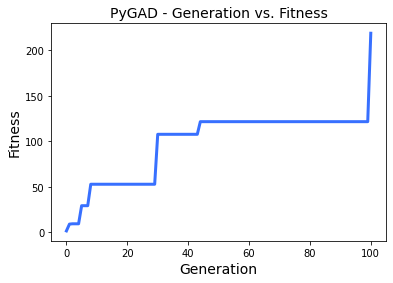

[ 1.82601341  1.04591861  3.81852771  2.41465161 -2.46211688  2.92029312]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.46211688  2.92888381]
[ 1.93244289  1.19443153  2.98329703  2.41465161 -2.46211688  2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.97721129 -2.19522084  2.3041033 ]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -2.46866962  2.32546781]
[ 1.82601341  1.1821029   1.12000732  4.36153918 -2.19522084  2.3041033 ]
[ 1.82601341  1.1821029   1.12162838  4.36153918 -2.278621    2.92888381]
[ 1.82601341  0.49515886  1.12162838  4.36153918 -2.46211688  2.32546781]
[ 1.93244289  1.19443153  2.98329703  2.39563337 -1.8229033   2.32546781]
[ 1.93244289  1.15799609  2.98329703  2.39563337 -2.00788523  2.3041033 ]
[ 2.7798138   1.19443153  2.98329703  2.97721129 -2.46866962  2.32546781]
[ 1.93244289  1.19443153  1.12000732  4.36153918 -2.19522084  2.24438307]
[ 2.68922122  1.04591861  3.81852771  

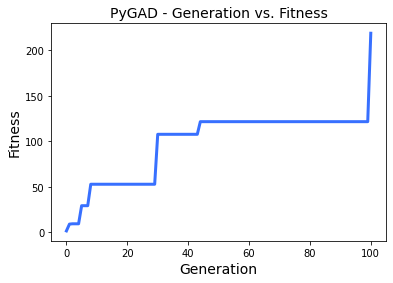

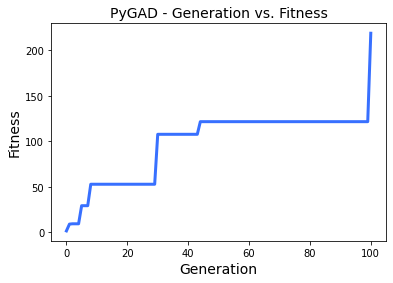

In [4]:
import pygad
import numpy

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    print(solution)
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

# [ 1.7772313  -2.62859114]   input [[4,-2,3.5,5,-11,-4.7], [4,-2,3.5,5,-11,-4.7], [4,-2,3.5,5,-11,-4.7]]
# [3.04801549] ----- input [[4,-2,3.5,5,-11,-4.7]]
# [-3.46364203  1.98650428 -2.44678739]
# [-2.65565773 -3.52488795  3.4831592  -0.74037102 -0.76192995  0.97530719]  --- input [4,-2,3.5,5,-11,-4.7]



# Example with geneticalgorithm

In [48]:
!pip install geneticalgorithm

  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=71c6f3491af96c4fd90c42e637cbc21c81934e03c75354c2f8cf306329164aa9
  Stored in directory: c:\users\maury\appdata\local\pip\cache\wheels\ef\91\3f\17cbea1e83d17cc01bd2d66a0d59e65301bcb2d59f2f6a62ab
Successfully built func-timeout

You should consider upgrading via the 'c:\users\maury\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# geneticalgorithm Example - 1

 The best solution found:                                                                           
 [0. 2. 0.]

 Objective function:
 2.0


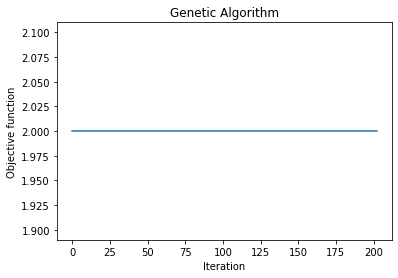

In [270]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    penalty = 0
    if X[0]+X[1]<2:
        penalty=500+1000*(2-X[0]-X[1])
    return np.sum(X)+penalty


varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='int',variable_boundaries=varbound, 
         algorithm_parameters={'max_num_iteration': 500,\
                                       'population_size':100,\
                                       'mutation_probability':0.1,\
                                       'elit_ratio': 0.01,\
                                       'crossover_probability': 0.5,\
                                       'parents_portion': 0.3,\
                                       'crossover_type':'uniform',\
                                       'max_iteration_without_improv':200})

model.run()

# geneticalgorithm Example - 2

 The best solution found:                                                                           
 [0.50006527 1.         0.        ]

 Objective function:
 1.500065274127743


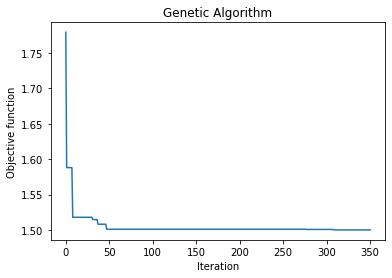

In [43]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return np.sum(X)

varbound=np.array([[0.5,1.5],[1,100],[0,1]])
vartype=np.array([['real'],['int'],['int']])
model=ga(function=f,dimension=3,variable_type_mixed=vartype,variable_boundaries=varbound)

model.run()